## Infering trajectories in imputed Diffusion Map using SCIMITAR branching

This notebook is a tutorial to use the script of imputed diffusion map branching SCIMITAR.

It starts with an already preprocessed dataset (log, normalized, batch-corrected ...) and allows you to perform imputation using the MAGIC package (GitHub: KrishnaswamyLab/MAGIC), diffusion map and visualize your data using either gene expression or entropy. Branching SCIMITAR can also be used directly on imputed data to infer trajectory in the data.

## First step: Loading script and data
We assume that you cloned the GitHub repo in your root directory.

In [22]:
#Let's first import the script by adding its location to our path
import sys
import os
import pandas as pd
sys.path.append('~/idmb_scimitar/')
import idmb_scimitar

#import the data that you downloaded
data=pd.read_csv('/Users/lucas/idmb_scimitar/examples/RG_PC_small_sample.csv', sep=',', index_col=0)

#Let's have a look at the data
data.head()

,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,...,ENSG00000282775,ENSG00000282790,ENSG00000282798,ENSG00000282799,ENSG00000282800,ENSG00000282805,ENSG00000282806,ENSG00000282810,ENSG00000282813,ENSG00000282814
Hi_GW16_15-Hi_GW16_15,0.475331,1.113283,0.518013,0.001217,0.174595,2.658892,0.273546,0.182771,1.559159,0.166348,...,0.378778,-0.018661,0.068562,0.01843,0.046994,-0.005469,-0.069104,0.036524,-0.017124,-0.008187
S23-C7,0.475331,0.776225,6.208840,0.001217,1.678589,2.090144,0.104054,1.489438,2.680437,0.166348,...,-0.020806,-0.018661,4.832006,0.01843,0.046994,0.718171,-0.069104,1.959059,-0.017124,-0.008187
O7-A7,2.461873,0.403365,0.140688,0.001217,0.054654,3.621214,0.661322,1.075027,1.481427,0.166348,...,-0.020806,1.706851,0.068562,0.01843,0.046994,1.290872,-0.069104,1.994086,-0.017124,-0.008187
S37-C1,0.475331,1.302427,0.140688,0.001217,0.054654,0.057151,0.104054,0.010891,0.029946,0.166348,...,-0.020806,-0.018661,0.068562,0.01843,0.046994,-0.005469,-0.069104,0.036524,-0.017124,-0.008187
S2-D3,0.475331,0.785402,7.891598,0.001217,0.054654,0.057151,6.227884,1.309824,0.029946,0.166348,...,-0.020806,-0.018661,0.068562,0.01843,0.046994,-0.005469,2.307167,0.036524,-0.017124,-0.008187


## Second step: Perform imputation using MAGIC

In [23]:
#Call the imputation function
imputed_data= idmb_scimitar.imputation(data)

doing PCA
Computing distances
Autotuning distances
Computing kernel
data has negative values, shifting to positive
computing optimal t
optimal t =  10
MAGIC: W_t = W^t
MAGIC: data_new = W_t * data


## Intermediate step: running Diffusion map and visualization
This step is not required as the branching scimitar function will call the diffusion map function, but it may be useful to look at the data to see if you find 'trajectory-like' structure before running a computationaly intensive trajectory inference function.

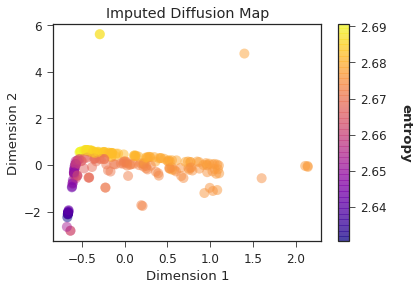

In [24]:
#Find 2D diffusion map coordinates for cells using imputed data
diff_map_coord=idmb_scimitar.get_imputed_diffmap(imputed_data)
#Plot coloring by entropy; you can also color by your favourite gene (if it is present in the data)
idmb_scimitar.plot_imputed_diffmap(diff_map_coord, data=imputed_data, colors='entropy')

It seens that we have a trajectory structure in the data! The gradient of entropy may correspond to a differentiation process.

## Third step: Performing branching SCIMITAR on the imputed data
This step will performs both diffusion map and branching scimitar. 
It takes in the imputed data, a number of nodes to be find in the trajectory graph (Default: 100), and optionally colors for the cells on the plot (we will be using entropy again here, but you can also pass a gene name).

The following objects will be stored in the variable:

    1) The scimitar object containing the graph information

    2) The negative binomial probabilities for each cell to belong to each node along the trajectory.

    3) A node assignment for each cell based on the negative binomial probablities


iter=0, obj=49.410770

iter=1, obj=8.844496

iter=2, obj=7.289887

iter=3, obj=6.024359

iter=4, obj=5.155616

iter=5, obj=4.842653

iter=6, obj=4.573352

iter=7, obj=4.209559

iter=8, obj=3.660342

iter=9, obj=3.382741

Estimating optimal shrinkage intensity lambda.var (variance vector): 
0.0139 



Estimating optimal shrinkage intensity lambda (correlation matrix): 
0.0188 



Estimating optimal shrinkage intensity lambda.var (variance vector): 
0.0542 



Estimating optimal shrinkage intensity lambda (correlation matrix): 
0.048 



Estimating optimal shrinkage intensity lambda.var (variance vector): 
1 



Estimating optimal shrinkage intensity lambda (correlation matrix): 
1 



Estimating optimal shrinkage intensity lambda.var (variance vector): 
0.2792 



Estimating optimal shrinkage intensity lambda (correlation matrix): 
0.2671 



Estimating optimal shrinkage intensity lambda.var (variance vector): 
0.2588 



Estimating optimal shrinkage intensity lambda (correlation matrix

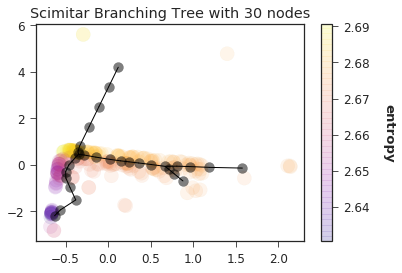

In [25]:
scimitar_results=idmb_scimitar.scimitar_model(imputed_data, n_nodes=30, colors='entropy')

Let's inspect the results:

In [26]:
scimitar_results

(<scimitar.branching.BranchedEmbeddedGaussians at 0x1a14b10550>,
 array([[ 0.28903278,  0.8139291 ,  2.21227022, ...,  0.23469451,
          2.78243187,  1.00978722],
        [ 1.60659463,  2.10429022,  3.27350777, ...,  1.37716476,
          3.37593144,  2.28626119],
        [ 1.16364495,  0.63850927,  2.50896449, ...,  1.6056607 ,
          1.96954218,  0.44265911],
        ..., 
        [ 0.5232071 ,  1.02601515,  2.51993732, ...,  0.47430107,
          2.72818961,  1.21361095],
        [ 1.03196011,  0.51256073,  2.4981691 , ...,  1.48270038,
          1.96238853,  0.32014477],
        [ 0.29794613,  0.8256886 ,  2.26670351, ...,  0.27509612,
          2.75267121,  1.02079071]]),
 array([ 23.,  14.,  13.,   5.,   0.,  24.,  18.,  20.,  13.,  23.,   1.,
         18.,  24.,  13.,  19.,  18.,  13.,  13.,   1.,  13.,   9.,  22.,
         13.,  13.,   0.,   0.,   8.,  12.,  20.,  18.,  16.,  13.,  23.,
         13.,  13.,  13.,  13.,  15.,  13.,  29.,  16.,   2.,  13.,   5.,
          0

You can now use the scimitar_json.py script to convert this to the 1st draft of consensus format for trajectories